In [16]:
import numpy as np
import matplotlib.pyplot as plt




from scipy.stats import norm

In [17]:
def summary(y,**kwargs):
    """Prints summary statistics of the data (random variables)
    
    Input parameter: 
        y (1-d numpy array) : array with sample data
    Returns:
        a tuple with mean, standard deviation, minimum, maximum 
    """
    # end of function's docstring (shows up when typing help(summary))
    
    # Note the print function uses inside the strings the placeholder %12.4f for 
    # formatting the list (Python type 'tuple') of numbers such as mean and stddev
    # they are printed where %12.4f shows up in the string #########.####
    
    print(40*"-")
    print('Summary statistics for the data:')
    if np.NAN in y:
        n=np.size(y)
        nmiss=np.sum(np.isnan(y))  
        nsample=n-nmiss
        print('Array size='+str(n))   
        print('Detected NAN (missing values) in array :'+str(nmiss))
        print('Sample size:'+str(nsample))
        m=np.nanmean(y)
        s=np.nanstd(y)
        mn=np.nanmin(y)
        mx=np.nanmax(y)
    else:
        nsample=np.size(y)
        print ('Sample size='+str(nsample))
        m=np.mean(y)
        s=np.std(y)
        mn=np.min(y)
        mx=np.max(y)
    print ('mean   : %12.4f' % (m))
    print ('stddev : %12.4f' % (s))  
    print ('mininum: %12.4f' % (mn))
    print ('maximum: %12.4f' % (mx))
    return m,s,mn,mx

In [26]:
# **********************************************************
# User control parameters
# **********************************************************
isCheck=True
nsample=1000 # size of the array with random values

In [27]:
# Independent and identically uniformly distributed random numbers
x1=np.random.uniform(size=nsample)

if isCheck:
    print()
    print()
    print('Just checking: what is x1?')
    print('\tObject type: ', type(x1))
    print('\tSize : ' + str(np.size(x1)))
    print('\t1-dim array with '+str(nsample)+' numbers')
    print()
    print()

m,s,mn,mx=summary(x1)



Just checking: what is x1?
	Object type:  <class 'numpy.ndarray'>
	Size : 1000
	1-dim array with 1000 numbers


----------------------------------------
Summary statistics for the data:
Sample size=1000
mean   :       0.5114
stddev :       0.2885
mininum:       0.0004
maximum:       0.9985


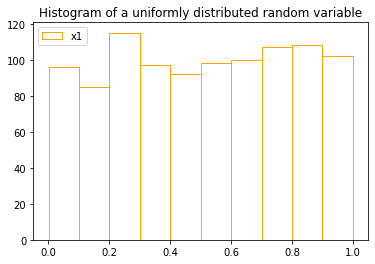

In [29]:
plt.hist(x1,bins=10,edgecolor='orange',label='x1',lw=1,fill=False)
plt.legend()
plt.title("Histogram of a uniformly distributed random variable")
plt.show()

In [21]:
# **********************************************************
# Now we create two uniformly distributed random variables
# **********************************************************

# two independent and identically distributed random number sets
x1=np.random.uniform(size=nsample)
x2=np.random.uniform(size=nsample)

m1,s1,mn1,mx1=summary(x1)
m2,s2,mn2,mx2=summary(x2)

----------------------------------------
Summary statistics for the data:
Sample size=1000
mean   :       0.4984
stddev :       0.2934
mininum:       0.0005
maximum:       1.0000
----------------------------------------
Summary statistics for the data:
Sample size=1000
mean   :       0.4946
stddev :       0.2947
mininum:       0.0024
maximum:       0.9974


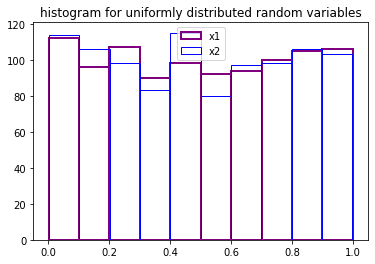

In [22]:
plt.hist(x1,bins=10,edgecolor='purple',label='x1',lw=2,fill=False)
plt.hist(x2,bins=10,edgecolor='blue',label='x2',lw=1,fill=False)
plt.title("histogram for uniformly distributed random variables")
plt.legend()
plt.show()

In [30]:
# summation of two independent and identically distributed random number sets
x1=np.random.uniform(size=nsample)
x2=np.random.uniform(size=nsample)

m1,s1,mn1,mx1=summary(x1)
m2,s2,mn2,mx2=summary(x2)

y=(x1+x2)
print()
print ("The sum of the two uniformly distributed random variables:")
ym,ys,ymn,ymx=summary(y)

----------------------------------------
Summary statistics for the data:
Sample size=1000
mean   :       0.4998
stddev :       0.2887
mininum:       0.0006
maximum:       0.9994
----------------------------------------
Summary statistics for the data:
Sample size=1000
mean   :       0.4859
stddev :       0.2928
mininum:       0.0002
maximum:       0.9992

The sum of the two uniformly distributed random variables:
----------------------------------------
Summary statistics for the data:
Sample size=1000
mean   :       0.9857
stddev :       0.4076
mininum:       0.0169
maximum:       1.9455


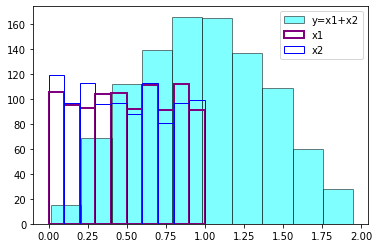

In [31]:
plt.hist(y,bins=10,color='cyan',edgecolor='black',label='y=x1+x2',lw=1,fill=True,alpha=0.5)
plt.hist(x1,bins=10,edgecolor='purple',label='x1',lw=2,fill=False)
plt.hist(x2,bins=10,edgecolor='blue',label='x2',lw=1,fill=False)
plt.legend()
plt.show()

----------------------------------------
Summary statistics for the data:
Sample size=1000
mean   :       1.4892
stddev :       0.5060
mininum:       0.1483
maximum:       2.7668


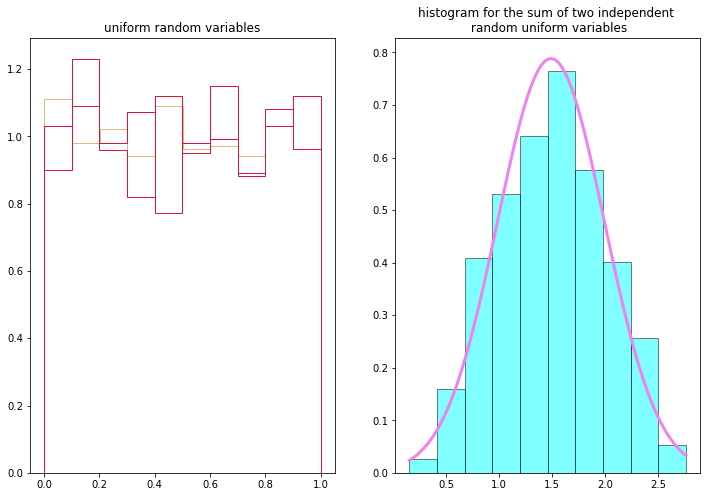

In [46]:
# figure with two histograms side by side
# sharing the same y-axis range is set off    
x1=np.random.uniform(size=nsample)
x2=np.random.uniform(size=nsample)
x3=np.random.uniform(size=nsample)
y=(x1+x2+x3)


nbin=10 # controls how many bins (bars) the histgram uses
fig, ax = plt.subplots(1, 2, sharex=False, sharey=False,figsize=(12,8))
# left figure
ax[0].hist(x1,bins=nbin,color='burlywood',density=True,histtype='step',label='x1')
ax[0].hist(x2,bins=nbin,color='crimson',density=True,histtype='step',label='x2')
ax[0].hist(x3,bins=nbin,color='crimson',density=True,histtype='step',label='x3')
ax[0].set_title('uniform random variables')
# right figure
ax[1].hist(y,bins=nbin,color='cyan',edgecolor='black',
           label='average (y=x1+x2)',density=True,alpha=0.5)
ax[1].set_title('histogram for the sum of two independent \n random uniform variables')


# last compare with the 'best fitted gaussian PDF'
# location parameter is the mean of y and scale parameter is the 
# standard deviation of y

ym,ys,ymn,ymx=summary(y)
# create x-values for the gaussian function plot
xhelp=np.linspace(ymn,ymx,num=100)

gaussian=norm.pdf(xhelp,ym,ys)

ax[1].plot(xhelp,gaussian,color='violet',linewidth=3)

fig.show()


Task 1: Observe what happens if you sum over more than two independent uniformly distributed random variables. 

NOTE
In the text we talk about the number of summation terms (e.g. in y=x1+x2+x3 the number is 3), not to be confused with the sample size. The sample size is the amount of data values we generate for the random variables. The sample size is the amount of data values we generate for the random variables that we use in the summation.
(a) Write code that allows you to sum over 3, 4, 5, and 6 uniformly distributed random variables.

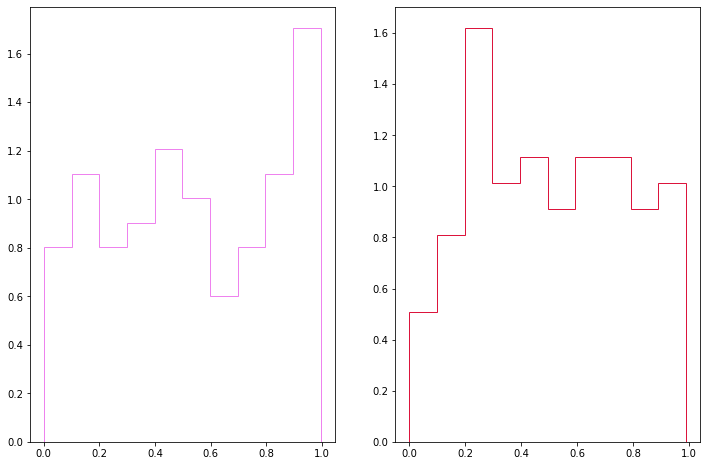

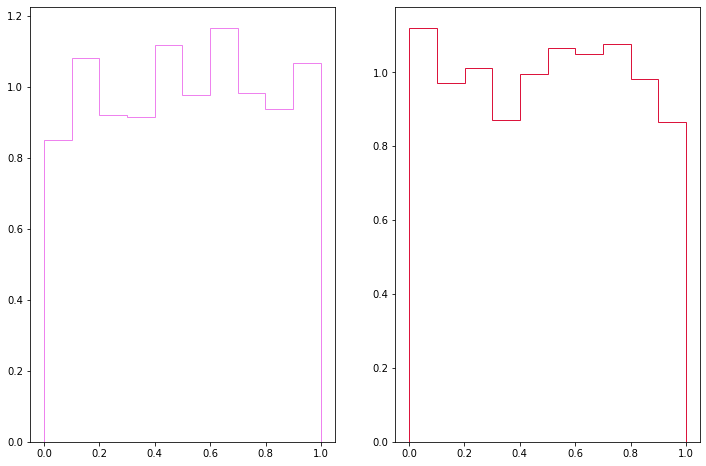

In [44]:
sample1=100
x1=np.random.uniform(size=sample1)
x2=np.random.uniform(size=sample1)
y=(x1+x2)
fig, ax = plt.subplots(1, 2, sharex=False, sharey=False,figsize=(12,8))
ax[0].hist(x1,bins=nbin,color='violet',density=True,histtype='step',label='x1')
ax[1].hist(x2,bins=nbin,color='crimson',density=True,histtype='step',label='x2')
fig.show()


sample1=2000
x1=np.random.uniform(size=sample1)
x2=np.random.uniform(size=sample1)
y=(x1+x2)
fig, ax = plt.subplots(1, 2, sharex=False, sharey=False,figsize=(12,8))
ax[0].hist(x1,bins=nbin,color='violet',density=True,histtype='step',label='x1')
ax[1].hist(x2,bins=nbin,color='crimson',density=True,histtype='step',label='x2')
fig.show()


(b) Adjust sample size and bin numbers to optimize the analysis of the shape of the resulting distribution shown in the histograms. Observe closely how the shape of the distribution of the summation variable (cyan colors) changes when the number of random uniform variables (x1, x2, ... ) is increased.
Keep the sample size nsample smaller than 100,000!

In [45]:
x1=np.random.uniform(size=nsample)
x2=np.random.uniform(size=nsample)
x3=np.random.uniform(size=nsample)
x4=np.random.uniform(size=nsample)
x5=np.random.uniform(size=nsample)
x6=np.random.uniform(size=nsample)
y=(x1+x2+x3+x4+x5+x6)


Task 3: Compare the distribution of the summation values with the normal distribution curve. How good does the curve fit the data. In particular, take a look at the tails of the distribution. 

Summarize your observations and discuss the following question: How many uniformly distributed random variables do you have to sum so that the sum (a random variable) is normally distributed.
